In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
walmart = pd.read_csv(r"C:\Users\Narendra Singh\Desktop\CSv's\Walmart Data Analysis and Forcasting.csv")
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
walmart.shape

(6435, 8)

In [8]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
# Check for missing values

walmart.isnull().sum()

# There is not missing values, which is good so far.

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
# Feature Engineering

# Convert 'Date' column to datetime format

walmart['Date'] = pd.to_datetime(walmart['Date'], format='%d-%m-%Y')

In [12]:
# Extract relevant date-time features

walmart['DayofWeek'] = walmart['Date'].dt.day_of_week
walmart['Month'] = walmart['Date'].dt.month
walmart['Year'] = walmart['Date'].dt.year

In [13]:
walmart.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayofWeek,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [17]:
# Exploratory data analysis (EDA)

walmart[['Store','Weekly_Sales']].groupby(['Store'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False)


# Stores 20,4, 14 and 13 are the top 4 performing stores on total sales

# Stores 36,5,44 and 33 are the bottom 4 perfomers on tatal sales

,Weekly_Sales
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06
10,1.899425e+06
27,1.775216e+06
6,1.564728e+06
1,1.555264e+06


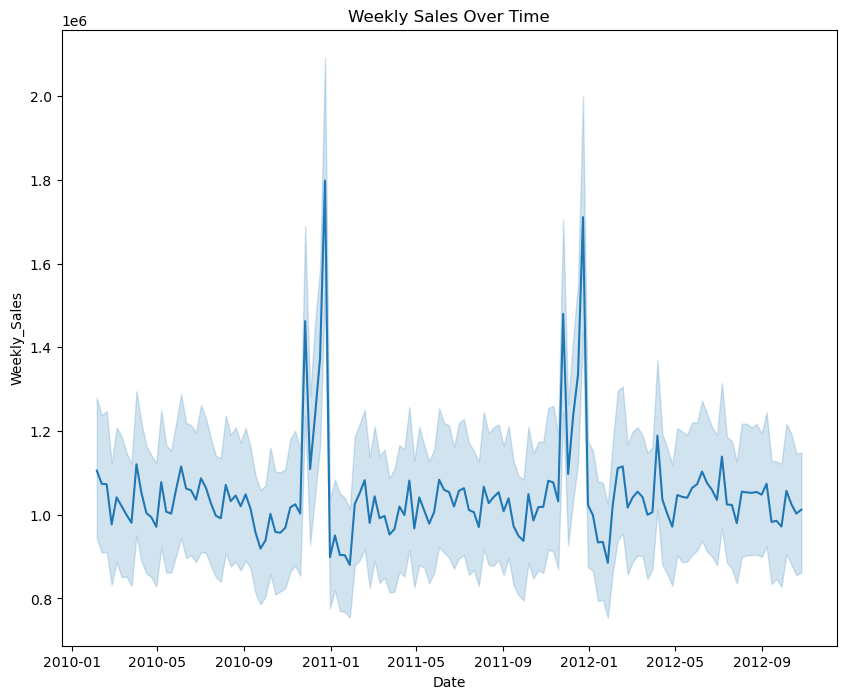

In [18]:
# Visualize the data

plt.figure(figsize=(10,8))
sns.lineplot(x='Date', y='Weekly_Sales', data=walmart)
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Weekly Sales Over Time')
plt.show()

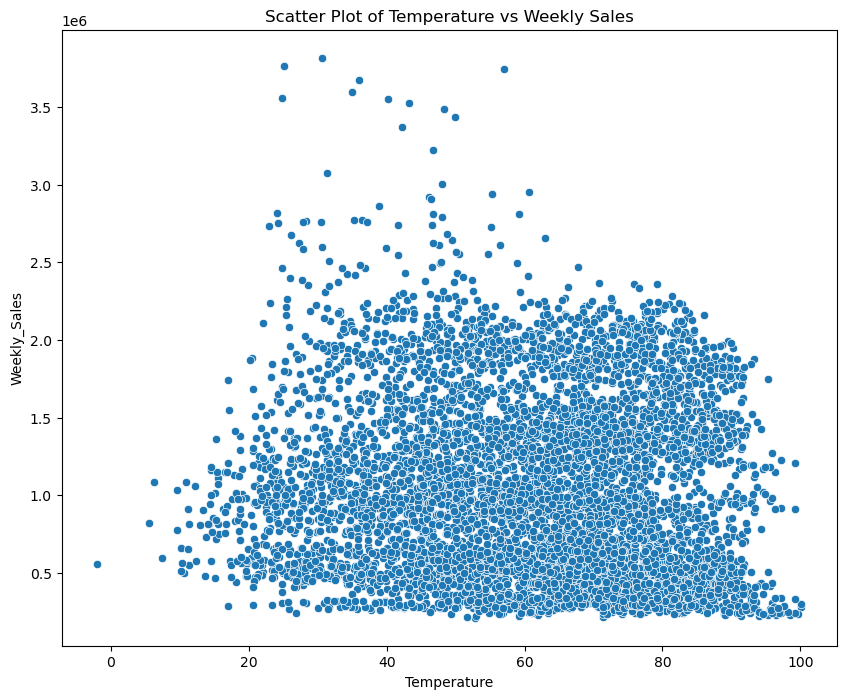

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=walmart)
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.title('Scatter Plot of Temperature vs Weekly Sales')
plt.show()

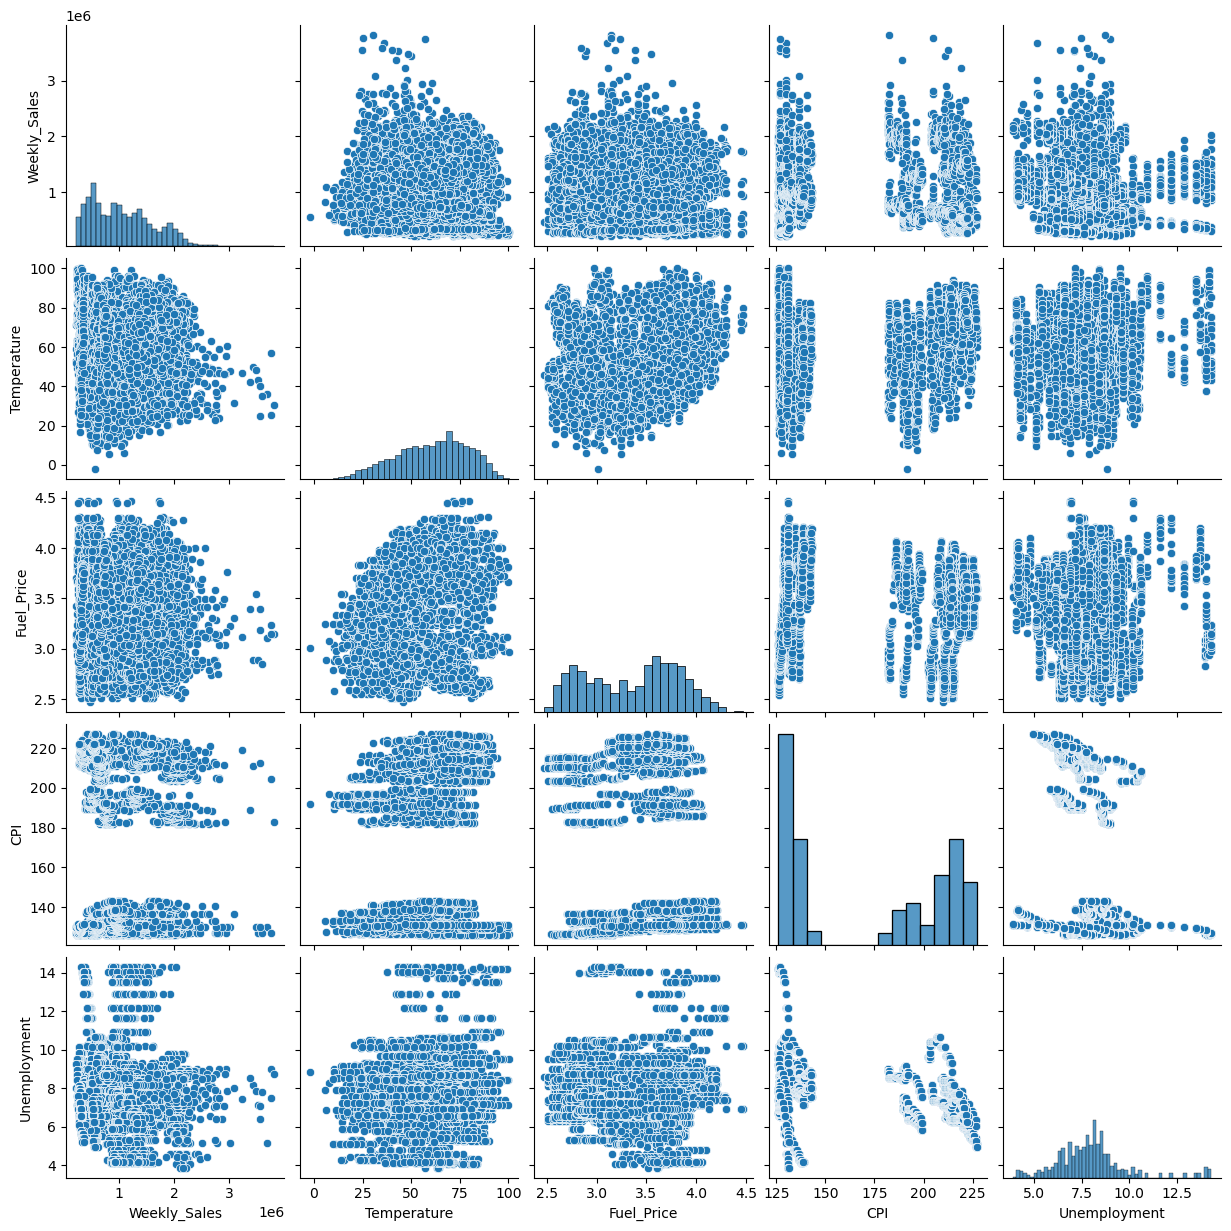

In [22]:
sns.pairplot(walmart[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()

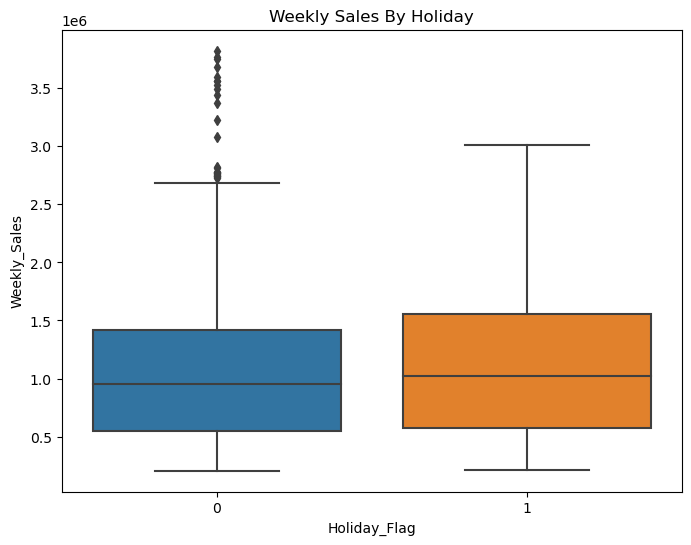

In [24]:
# Visualizing sales statistics on normal days and holidays 

plt.figure(figsize=(8,6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=walmart)
plt.xlabel('Holiday_Flag')
plt.ylabel('Weekly_Sales')
plt.title('Weekly Sales By Holiday')
plt.show()

<Axes: xlabel='Month'>

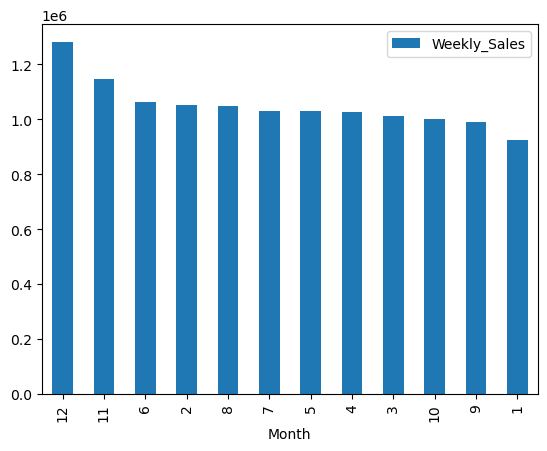

In [28]:
walmart[['Month', 'Weekly_Sales']].groupby(['Month'], as_index=True).mean().sort_values('Weekly_Sales', ascending=False).plot.bar()

In [29]:
walmart[['Year', 'CPI']].groupby('Year', as_index=True).mean().sort_values(by='CPI', ascending=False)

,CPI
Year,
2012,175.498781
2011,171.545716
2010,168.101782


<Axes: xlabel='Year'>

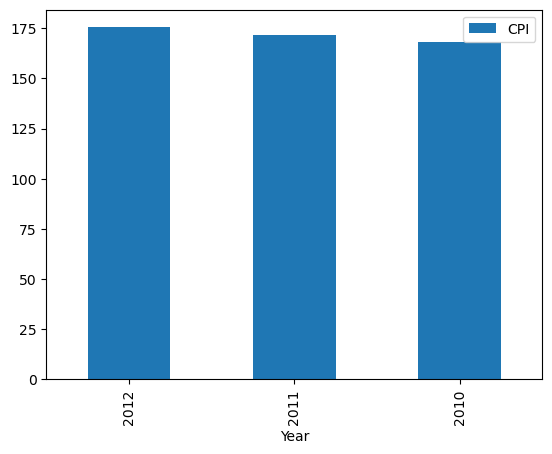

In [32]:
walmart[['Year', 'CPI']].groupby('Year', as_index=True).mean().sort_values(by='CPI', ascending=False).plot.bar()

In [33]:
# Correlation analysis

Correlation_matrix = walmart.corr()

C:\Users\Narendra Singh\AppData\Local\Temp\ipykernel_7984\3468505914.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_matrix = walmart.corr()


C:\Users\Narendra Singh\AppData\Local\Temp\ipykernel_7984\3592910984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_matrix = walmart.corr()


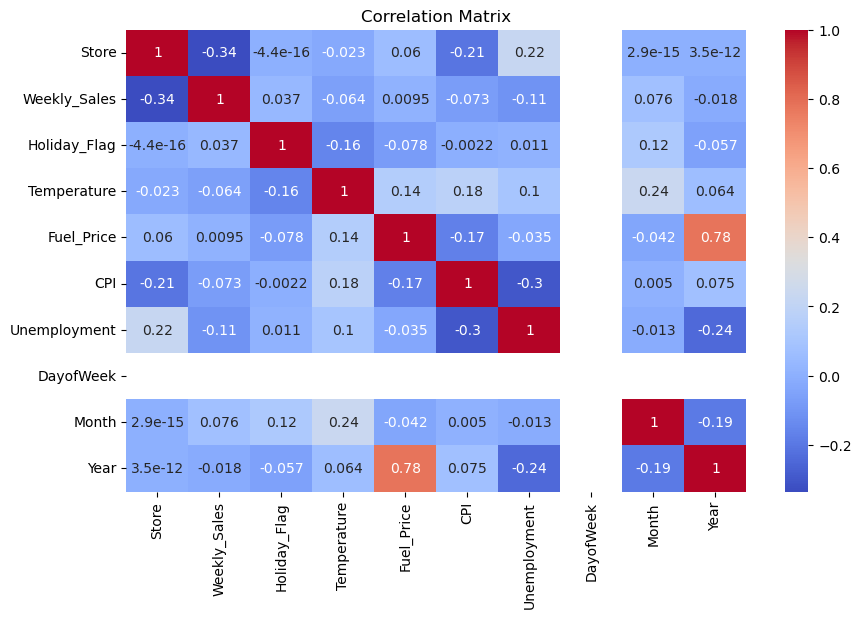

In [40]:
Correlation_matrix = walmart.corr()
plt.figure(figsize=(10,6))
sns.heatmap(Correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [43]:
# Time-Series Analysis
# Visualize the underlying components of the time series, including trend, seasonality, and residual.


decomposition = seasonal_decompose(walmart['Weekly_Sales'], period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

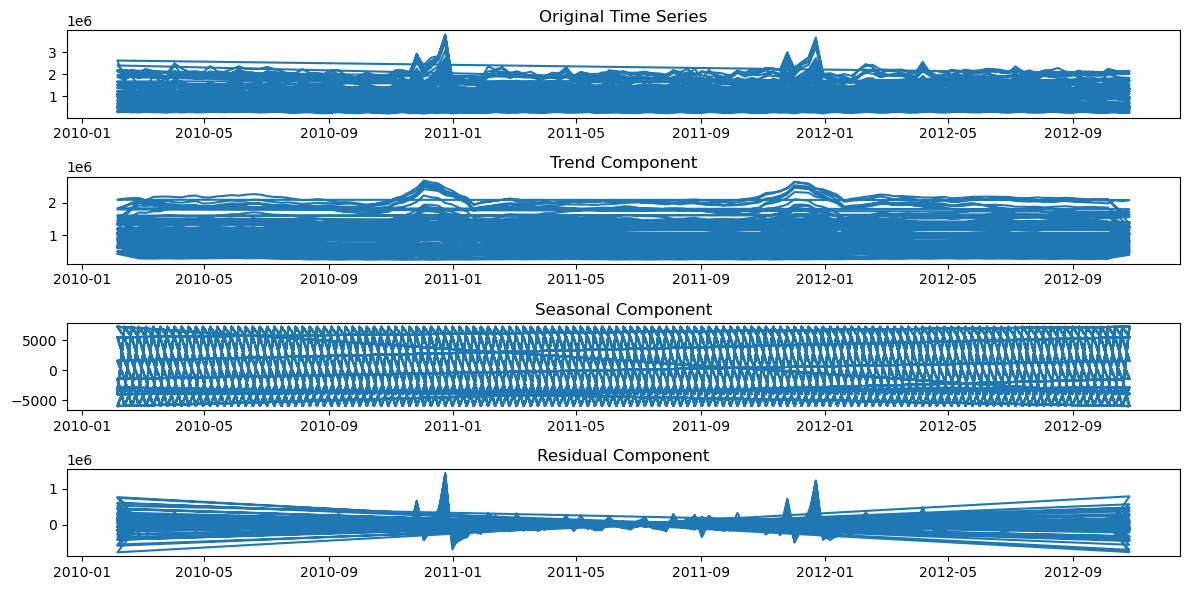

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(walmart['Date'], walmart['Weekly_Sales'], label='Original')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(walmart['Date'], trend, label='Trend')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(walmart['Date'], seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(walmart['Date'], residual, label='Residual')
plt.title('Residual Component')
plt.tight_layout()
plt.show()

# Analysis:

# The "Original Weekly Sales" plot shows the observed weekly sales data.
# The "Trend Component" show an upward trend over the festive season which is essentially November and December months.
# The "Seasonal Component" plot exhibits monthly seasonality upward and downward patterns.

In [45]:
# Machine Learning Modeling

walmart.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'DayofWeek', 'Month', 'Year'],
      dtype='object')

In [47]:
# Split the data into features and target variable

X = walmart[['Store', 'Holiday_Flag', 'CPI', 'DayofWeek', 'Month', 'Year']]
Y = walmart[['Weekly_Sales']]

In [48]:
# Split the data into training and testing sets

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)


In [49]:
# Linear Regression

linear_model = LinearRegression()

In [50]:
linear_model.fit(xtrain,ytrain)

LinearRegression()

In [54]:
# Get the coefficients of the Linear Regression model

# Assuming X.columns is a pandas Index object and linear_model.coef_ is a NumPy array
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_.flatten()})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print('Linear Regression Coefficients:')
print(coefficients)

# By using the flatten() method, you ensure that the coefficient array becomes a 1-dimensional array

Linear Regression Coefficients:
        Feature   Coefficient
1  Holiday_Flag  63788.274550
4         Month  13672.816938
5          Year   4234.399236
3     DayofWeek      0.000000
2           CPI  -2086.117479
0         Store -15714.226155


In [55]:
# Predict sales on the test set

ypred_linear = linear_model.predict(xtest) 

In [56]:
# Calculate evaluation metrics for Linear Regression

mse_linear = mean_squared_error(ytest, ypred_linear)
mae_linear = mean_absolute_error(ytest, ypred_linear)
r2_linear = r2_score(ytest, ypred_linear)
print(f'Linear Regression Mean Squared Error (MSE): {mse_linear}')
print(f'Linear Regression Mean Absolute Error (MAE): {mae_linear}')
print(f'Linear Regression R-squared (R2): {r2_linear}')

Linear Regression Mean Squared Error (MSE): 274358062063.70123
Linear Regression Mean Absolute Error (MAE): 434468.7630628272
Linear Regression R-squared (R2): 0.14836512598967277


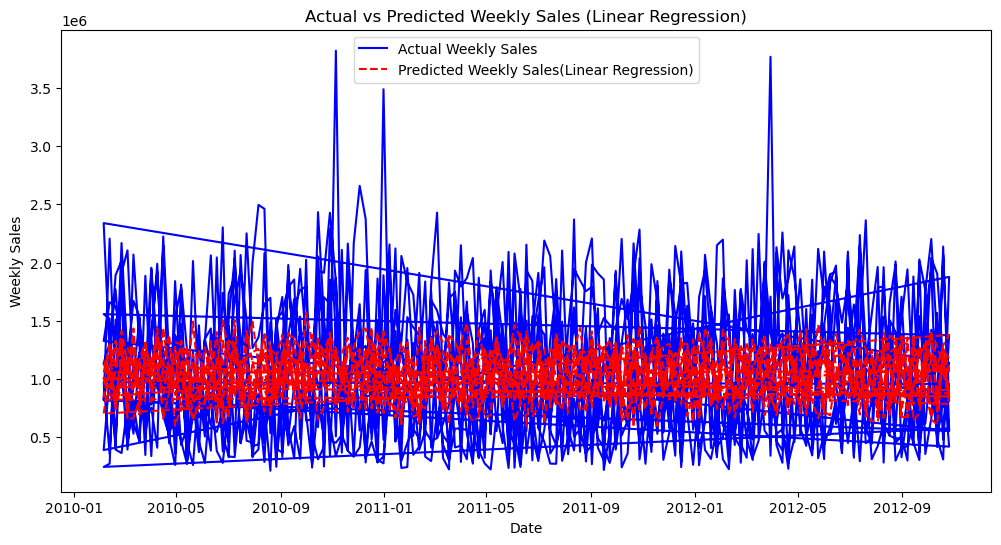

In [59]:
# Plot actual vs predicted sales for Linear Regression

plt.figure(figsize=(12,6))
plt.plot(walmart['Date'][len(walmart)-len(ytest):], ytest, label = 'Actual Weekly Sales', color = 'Blue')
plt.plot(walmart['Date'][len(walmart)-len(ytest):], ypred_linear, label = 'Predicted Weekly Sales(Linear Regression)', color ='Red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales (Linear Regression)')
plt.legend()
plt.show()

In [60]:
# Random Forest Regressor

# Create a Random Forest Regressor model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [61]:
# Fit the model to the training data

rf_model.fit(xtrain,ytrain)

c:\Users\Narendra Singh\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [63]:
# Predict sales on the test set
ypred_rf= rf_model.predict(xtest) 

In [64]:
# Calculate evaluation metrics for Random Forest

mse_rf = mean_squared_error(ytest, ypred_rf)
mae_rf = mean_absolute_error(ytest, ypred_rf)
r2_rf = r2_score(ytest, ypred_rf)
print(f'Random Forest Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest Mean Absolute Error (MAE): {mae_rf}')
print(f'Random Forest R-squared (R2): {r2_rf}')

Random Forest Mean Squared Error (MSE): 18565147603.976215
Random Forest Mean Absolute Error (MAE): 70494.92054607614
Random Forest R-squared (R2): 0.9423719244050338


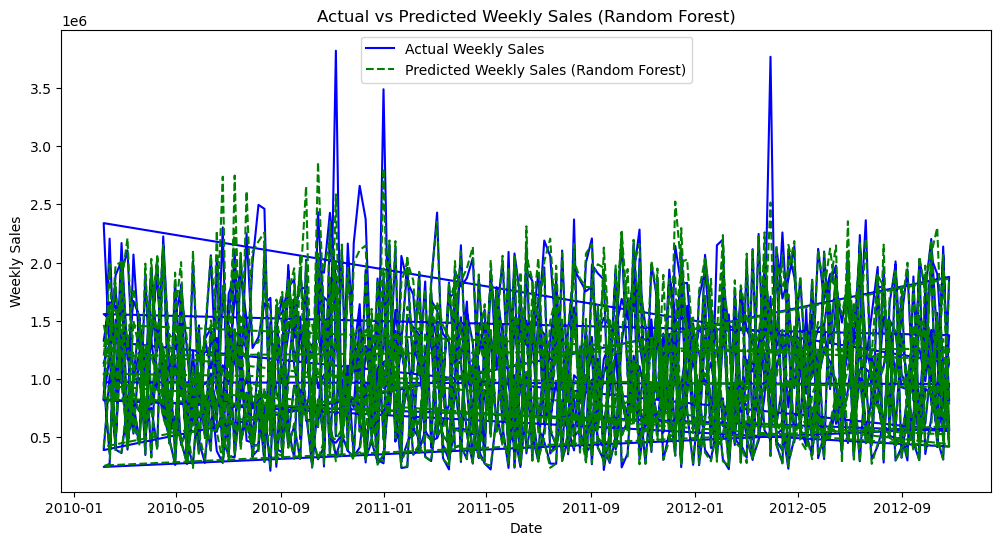

In [66]:
# Plot actual vs predicted sales for Random Forest

plt.figure(figsize=(12, 6))
plt.plot(walmart['Date'][len(walmart)-len(ytest):], ytest, label='Actual Weekly Sales', color='blue')
plt.plot(walmart['Date'][len(walmart)-len(ytest):], ypred_rf, label='Predicted Weekly Sales (Random Forest)', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales (Random Forest)')
plt.legend()
plt.show()

In [67]:
# Get feature importances for Random Forest
rf_feature_importance = rf_model.feature_importances_

# Pair feature names with their importance scores
feature_names = X.columns
rf_feature_importance_dict = dict(zip(feature_names, rf_feature_importance))

# Sort features by importance in descending order
rf_sorted_feature_importance = sorted(rf_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print('Random Forest Feature Importance:')
for feature, importance in rf_sorted_feature_importance:
    print(f'{feature}: {importance}')

Random Forest Feature Importance:
Store: 0.764231221832417
CPI: 0.18648012826680344
Month: 0.037763010795528025
Holiday_Flag: 0.006533810476728712
Year: 0.004991828628522889
DayofWeek: 0.0


In [68]:
# Time Series Forecasting - SARIMA

# Sort the data by date for time series analysis
walmart.sort_values('Date', inplace=True)

In [69]:
# Create a SARIMA model for weekly sales forecasting

sarima_model = SARIMAX(walmart['Weekly_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

c:\Users\Narendra Singh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Narendra Singh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [70]:
# Calculate SARIMA predictions on the training data
y_pred_sarima_training = sarima_results.predict(start=0, end=len(xtrain) - 1)

In [71]:
# Calculate MSE and MAE for SARIMA on the training data
mse_sarima_training = mean_squared_error(ytrain, y_pred_sarima_training)
mae_sarima_training = mean_absolute_error(ytrain, y_pred_sarima_training)

# Print SARIMA training accuracy metrics
print(f'SARIMA Mean Squared Error (MSE) on Training Data: {mse_sarima_training}')
print(f'SARIMA Mean Absolute Error (MAE) on Training Data: {mae_sarima_training}')

SARIMA Mean Squared Error (MSE) on Training Data: 333450489419.2709
SARIMA Mean Absolute Error (MAE) on Training Data: 476756.1075814093


In [72]:
# Forecast future sales using SARIMA
future_sales_sarima = sarima_results.forecast(steps=len(xtest))
future_data = xtest.copy()
future_data['Predicted_Weekly_Sales_SARIMA'] = future_sales_sarima

c:\Users\Narendra Singh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Narendra Singh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [73]:
# Calculate evaluation metrics for SARIMA on the test data
mse_sarima = mean_squared_error(ytest, future_sales_sarima)
mae_sarima = mean_absolute_error(ytest, future_sales_sarima)
r2_sarima = r2_score(ytest, future_sales_sarima)
print(f'SARIMA Mean Squared Error (MSE) on Test Data: {mse_sarima}')
print(f'SARIMA Mean Absolute Error (MAE) on Test Data: {mae_sarima}')
print(f'SARIMA R-squared (R2) on Test Data: {r2_sarima}')

SARIMA Mean Squared Error (MSE) on Test Data: 326111939625.16144
SARIMA Mean Absolute Error (MAE) on Test Data: 472425.7585681182
SARIMA R-squared (R2) on Test Data: -0.012284087906460073


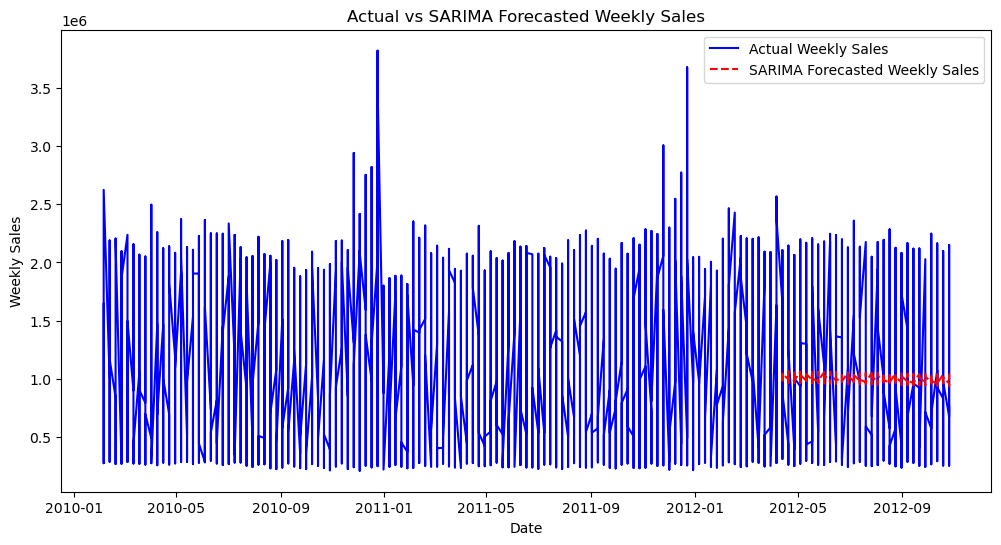

In [74]:
# Plot actual vs predicted sales for SARIMA
plt.figure(figsize=(12, 6))
# Plot actual sales for the historical data
plt.plot(walmart['Date'], walmart['Weekly_Sales'], label='Actual Weekly Sales', color='blue')
# Plot SARIMA forecast for the future data
plt.plot(walmart['Date'].iloc[-len(xtest):], future_sales_sarima, label='SARIMA Forecasted Weekly Sales', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs SARIMA Forecasted Weekly Sales')
plt.legend()
plt.show()

In [75]:
# Compare model accuracies
print(f'Linear Regression Mean Squared Error (MSE): {mse_linear}')
print(f'Random Forest Mean Squared Error (MSE): {mse_rf}')
print(f'SARIMA Mean Squared Error (MSE): {mse_sarima}')

Linear Regression Mean Squared Error (MSE): 274358062063.70123
Random Forest Mean Squared Error (MSE): 18565147603.976215
SARIMA Mean Squared Error (MSE): 326111939625.16144


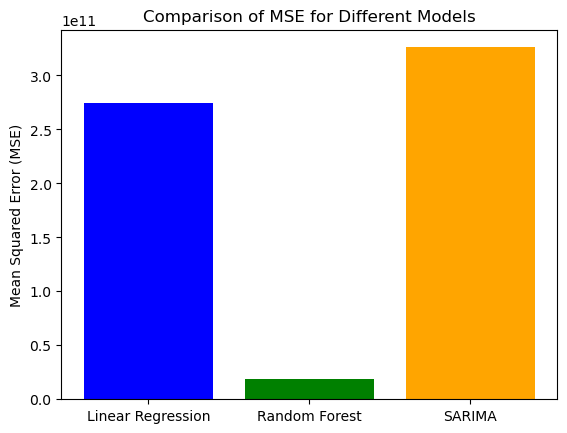

In [78]:
import matplotlib.pyplot as plt

# Assuming you have the three MSE values
mse_values = [mse_linear, mse_rf, mse_sarima]
models = ['Linear Regression', 'Random Forest', 'SARIMA']

# Creating a bar plot
plt.bar(models, mse_values, color=['blue', 'green', 'orange'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Different Models')
plt.show()
